<a href="https://colab.research.google.com/github/obengdouglas/DSI-2022/blob/main/Analysis_of_conflicts_West_Africa_2021_ACLED1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis of Crisis Events in West Africa 2021 using ACLED data
===========================================================

## **0. Outline**

1.	Import Libraries
2.	Countries with Highest Number of Conflicts in West Africa, 2021
3.	Countries with Highest Number of Fatalities in West Africa, 2021
4.	West Africa: Conflicts vs. Fatalities [2021]
5.	Map of West African Countries per  with Fatalities
6.	Map of West African Countries per Conflicts
7.	WorldCloud of most Used Words by News Agencies
8.	Causes of Conflicts in West africa, 2021
9.	Answer of the Question (What happened in 2021)
•	Conflicts Reported in Africa in 2021
•	Fatalities Reported in Africa in 2021
•	Causes of Conflicts in 2021
10.	 Most Popular News Sources in 2021
11.	Conflicts & Fatalities by Month in 2021
12.	Countries in Conflicts in 2021

14.	Angola Analysis during 2021
•	Conflicts Between Actors in Angola
•	Month vs. Weekday Fatalities Distribution

## **1. Introduction**

This project is my submission for the DSI Module 3 Twist Challenge on Natural Language Processing (NLP). For this project, I used open-source data from the Armed Conflict Location & Event Data Project (ACLED.

Armed Conflict Location & Event Data Project (ACLED) is a disaggregated conflict collection, analysis and crisis mapping project. ACLED’s aim is to capture the forms, actors, dates and locations of political violence and protest as it occurs across states. The ACLED team conducts analysis to describe, explore and test conflict scenarios, and makes both data and analysis open to freely use by the public.

This has Conflicts data from 2015 to the present. ACLED collects the dates, actors, types of violence, locations, and fatalities of all reported political violence and protest events across Africa, South Asia, South East Asia and the Middle East. Political violence and protest includes events that occur within civil wars and periods of instability, public protest and regime breakdown.

The project focuses on West Africa for the year 2021. West Africa has 16 countries, 10 of which are french speaking.



## **2. Objectives**

The objectives of the project are:
- Analysis of the crisis events in W/A for 2021 with particular emphasis on event types and fatalities in this notebook (using plotly)
- Translation of notes coulumn from English to French using huggingface translation transformers. For each event, there is a notes column which has a summary of the details of the event in English. The translation is mainly to aid people in French-speaking West Africa to understand the circumstances of these events.
- Further analysis of data in Tableau which is flexible for dashboards and deployment. Output from the translation is used for a French labelled dashboard

## **3. Import Libraries**

In [48]:
!pip install transformers
!pip install squarify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import cm
sns.set_style('ticks')
import plotly.offline as py
import squarify
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from wordcloud import WordCloud
import os
from transformers import pipeline #Retrieve pipeline of modules 
import csv
from tqdm import tqdm
import time
from datetime import timedelta

import plotly.io as pio #uncomment if working in colab
pio.renderers.default = "colab" #uncomment if working in colab

## **4. Read and Manipulate Data**

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/obengdouglas/DSI-2022/main/module3-nlp-twist/Data/ACLED-2021-01-01-2021-12-31-Western_Africa.csv', sep=",", nrows = 8837, skip_blank_lines=True, na_filter=True)
df.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,8705324,478,MAA1295,1295,31-Dec-21,2021,2,Protests,Peaceful protest,Protesters (Mauritania),...,Nouakchott,18.0801,-15.9777,1,Adrar Info,National,"Around 31 December 2021 (as reported), credito...",0,1641863885,MRT
1,8705857,466,MLI6030,6030,31-Dec-21,2021,1,Battles,Armed clash,Military Forces of Mali (2021-),...,Diangassagou,13.9964,-3.9414,2,FAMAMali,National,"On 31 December 2021, the Malian army foiled an...",16,1641863886,MLI
2,8706204,288,GHA1362,1362,31-Dec-21,2021,1,Battles,Armed clash,Unidentified Armed Group (Ghana),...,Accra,5.5560,-0.1969,1,My Joy Online,Subnational,"On 31 December 2021, gunmen clashed with priva...",0,1641863887,GHA
3,8706259,566,NIG23106,23106,31-Dec-21,2021,1,Riots,Mob violence,Rioters (Nigeria),...,Oshogbo,7.7667,4.5667,1,Nigeria Punch,National,"On 31 December 2021, a mob attacked Amotekun o...",1,1641863887,NGA
4,8706524,566,NIG23102,23102,31-Dec-21,2021,1,Riots,Violent demonstration,Rioters (Nigeria),...,Bogoro,9.6667,9.6000,1,Sahara Reporters,Regional,"On 31 December 2021, a mob demonstrated and de...",0,1641863887,NGA


### 4.1  Lowercase headers, Reduce the dataset

In [50]:
# Lowercase all the columns name
df.rename(str.lower, axis = 'columns', inplace = True)
# Reduce the dataset to the necessary columns
df = df[['actor1', 'actor2','country', 'event_date', 'event_type', 'fatalities','latitude', 'location',
       'longitude', 'notes', 'source', 'year']]
df.head()
# checking for null Values in percent
round((df.isnull().sum()/df.shape[0])*100,2)

actor1         0.00
actor2        19.41
country        0.00
event_date     0.00
event_type     0.00
fatalities     0.00
latitude       0.00
location       0.00
longitude      0.00
notes          0.00
source         0.00
year           0.00
dtype: float64

### 4.2  Month, Day from datetime

In [51]:
# Convert Event date from a str to datetime format
df.event_date = pd.to_datetime(df.event_date)
#Let extract Month, and ,years
df['year_extract']= df['event_date'].apply(lambda x: x.year) #this will extract years from the event_date format
df['month']= df['event_date'].apply(lambda x: x.month) #this will extract Month from the event_date format
df['day of week']= df['event_date'].apply(lambda x: x.dayofweek)
dmonth = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',
         9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['month'] = df['month'].map(dmonth)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day of week']= df['day of week'].map(dmap)
df.head()

,actor1,actor2,country,event_date,event_type,fatalities,latitude,location,longitude,notes,source,year,year_extract,month,day of week
0,Protesters (Mauritania),NaN,Mauritania,2021-12-31,Protests,0,18.0801,Nouakchott,-15.9777,"Around 31 December 2021 (as reported), credito...",Adrar Info,2021,2021,Dec,Fri
1,Military Forces of Mali (2021-),JNIM: Group for Support of Islam and Muslims,Mali,2021-12-31,Battles,16,13.9964,Diangassagou,-3.9414,"On 31 December 2021, the Malian army foiled an...",FAMAMali,2021,2021,Dec,Fri
2,Unidentified Armed Group (Ghana),Private Security Forces (Ghana),Ghana,2021-12-31,Battles,0,5.5560,Accra,-0.1969,"On 31 December 2021, gunmen clashed with priva...",My Joy Online,2021,2021,Dec,Fri
3,Rioters (Nigeria),Amotekun Corps,Nigeria,2021-12-31,Riots,1,7.7667,Oshogbo,4.5667,"On 31 December 2021, a mob attacked Amotekun o...",Nigeria Punch,2021,2021,Dec,Fri
4,Rioters (Nigeria),Civilians (Nigeria),Nigeria,2021-12-31,Riots,0,9.6667,Bogoro,9.6000,"On 31 December 2021, a mob demonstrated and de...",Sahara Reporters,2021,2021,Dec,Fri


## **5. Exploratory Data Analysis (EDA)**

### 5.1 Countries with the Highest number of Conflicts

In [73]:

#change a long country name to an alias

df.country.value_counts().head()
data_1 = df.country.value_counts().sort_values(ascending=False)
x=data_1.index
y= data_1.values

trace1 = go.Bar(
    x=x,
    y=y,
    text = y,
    textposition = 'auto',
    textfont = {'size':12,'color':'black'},
    marker=dict(
    color='SlateGray'),
    opacity=0.8,
    orientation ='v',
)

data = [trace1]

layout = go.Layout (
    yaxis = dict (
    title = 'Numbers of Conflitc'),
    
    xaxis = dict (
    title = 'Country'),
    
    title = 'Top 10 Countries with Highest Conflicts'
)
fig = go.Figure (data=data, layout = layout)
py.iplot(fig)


## Analysis: The top 3 crisis events countries are Nigeria, Burkina Faso and Mali accounting for 42%, 21% and 15% respectively of all events in West Africa. Together, they account for 78% of all crisis events.

### 5.2. Countries with the highest Number of Fatalities

In [53]:
data_2 = df.groupby('country')['fatalities'].sum().sort_values(ascending=False)
x=data_2.index
y= data_2.values

trace1 = go.Bar(
    x=x,
    y=y,
    text = y,
    textposition = 'auto',
    textfont = {'size':18,'color':'blue'},
    marker=dict(
    color='darkred'),
    opacity=0.8,
    orientation ='v',
)

data = [trace1]

layout = go.Layout (
    
    xaxis = dict (
    title = 'Countries Name'),
    
    title = 'Countries with Highest Fatalities'
)
fig = go.Figure (data=data, layout = layout)
py.iplot(fig)


## Analysis: The top 3 crisis countries for fatalities are Nigeria, Burkina Faso and Mali accounting for 62%, 15% and 12% respectively of all fatalities in West Africa. Together, they account for 89% of all fatalities.

### 5.4 Map of West Africa: Fatalities per Country

In [72]:
rt = df.groupby('country').sum()['fatalities'].sort_values(ascending=False)

data = [dict(
        type='choropleth',
        locations= rt.index,
        locationmode='country names',
        z=rt.values,
        text=rt.index,
        colorscale='Reds',
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(autotick=False, tickprefix='', title=' Fatalities Scale'),
)]
layout = dict(title = 'Fatalities reported in Africa [2021]',
             geo = dict(
            showframe = True,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        ),)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)


## Analysis: Nigeria is a clear outlier on the fatalities map

### 5.5 Map of West Africa: Conflicts per country

In [59]:
rt2 = df.country.value_counts().sort_values(ascending=False)

data = [dict(
        type='choropleth',
        locations= rt2.index,
        locationmode='country names',
        z=rt2.values,
        text=rt2.index,
        colorscale='Reds',
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(autotick=False, tickprefix='', title=' Countries with Conflicts'),
)]
layout = dict(title = 'Conflicts reported in Africa [2021]',
             geo = dict(
            showframe = True,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        ),)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)

## Analysis: Nigeria is a clear outlier on the crisis events map

### 5.6 WordCloud of most used Words by the News Report Agencies

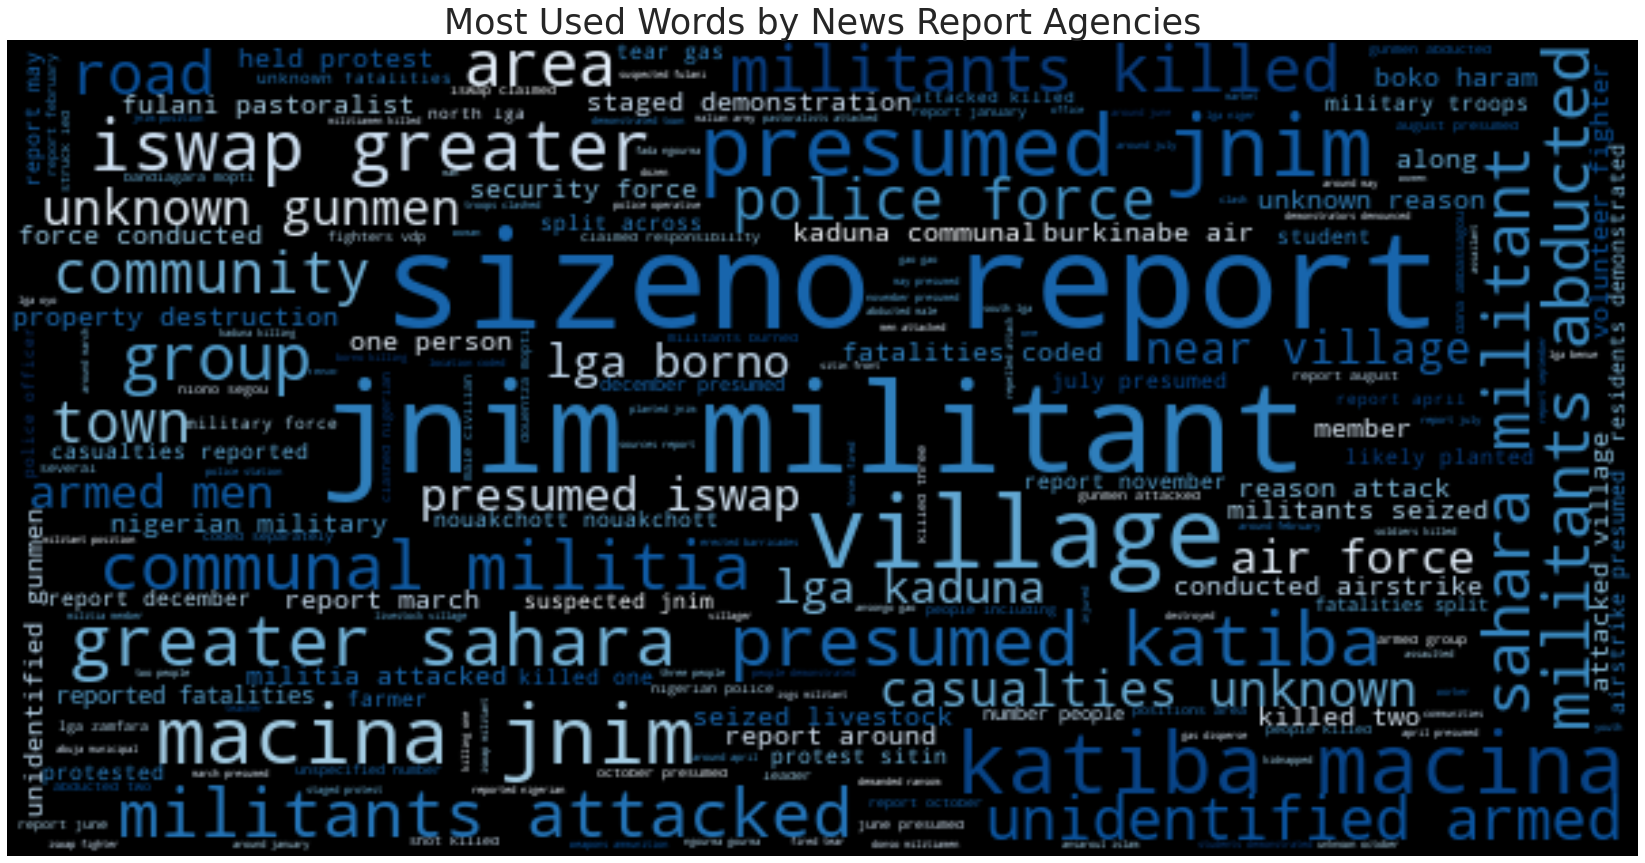

In [60]:
#clean data
import re
from nltk.corpus import stopwords
clean_1 = re.compile('[/(){}\[\]\|@,;]')
clean_2 = re.compile('[^0-9a-z #+_]')
def clean_text (text):
    text = text.lower()
    text = clean_1.sub(' ',text) # compile and replace those symbole by empty scpace
    text = clean_2.sub('',text)
    text_2 = [word.strip() for word in text.split() if not word in set(stopwords.words('english'))]
    new_text = ''
    for i in text_2:
        new_text +=i+' '
    text = new_text
    return text.strip()

# remove null value from column 'notes'
note_data = df.dropna(subset=['notes'])
note_data['notes'] = note_data['notes'].apply(lambda x: " ".join(x.lower() for x in x.split()))
note_data['notes'] = note_data['notes'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

from wordcloud import WordCloud

wc = WordCloud(max_font_size=50, width=600, height=300,colormap='Blues')
wc.generate(' '.join(note_data['notes'].values))

plt.figure(figsize=(30,15))
plt.imshow(wc,interpolation="bilinear")
plt.title("Most Used Words by News Report Agencies", fontsize=35)
plt.axis("off")
plt.show() 

### 5.7. Causes of Conflicts in West Africa

In [61]:
# Lower all word in event_type
df.event_type = df.event_type.apply(lambda x: x.lower())
event_data = df.groupby('event_type').sum().reset_index()
# Create a new columns that count the numbers of counflicts 
d = dict(df.event_type.value_counts())
event_data['conflicts'] = event_data['event_type'].map(d)
# Sort the data by Fatalities
event_data.sort_values(by='fatalities', ascending=False,inplace=True)
#reduce the data to only 8 event type
event_data = event_data.head(8)

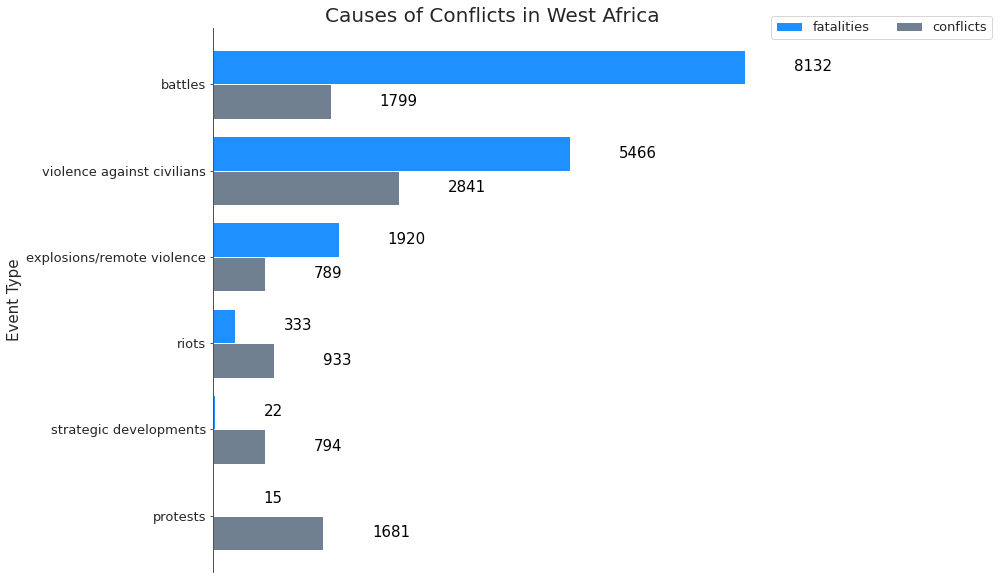

In [62]:
f, ax = plt.subplots(1,1,figsize = (10,10))
ax = event_data[['fatalities', 'conflicts']].plot(kind='barh',ax=ax,width=0.8,
              color=['dodgerblue', 'slategray'], fontsize=13);

ax.set_title("Causes of Conflicts in West Africa",fontsize=20)
ax.set_ylabel("Event Type", fontsize=15)

ax.set_yticklabels(event_data.event_type.values)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+750, i.get_y()+.25, \
            str(int(round(((i.get_width()))))), fontsize=15, color='black')

# invert for largest on top 
ax.invert_yaxis()
sns.despine(bottom=True)
x_axis = ax.axes.get_xaxis().set_visible(False) # turn off the y axis label
plt.legend(loc=(1.0,0.98),fontsize=13,ncol=2)
plt.show()


## Analysis: Battles, violence against civilians and explosions lead to the highest numbers of fatalities. Battles lead to a disproportionately high incidence of fatalities.

### 5.8 Most Popular News Sources in 2021

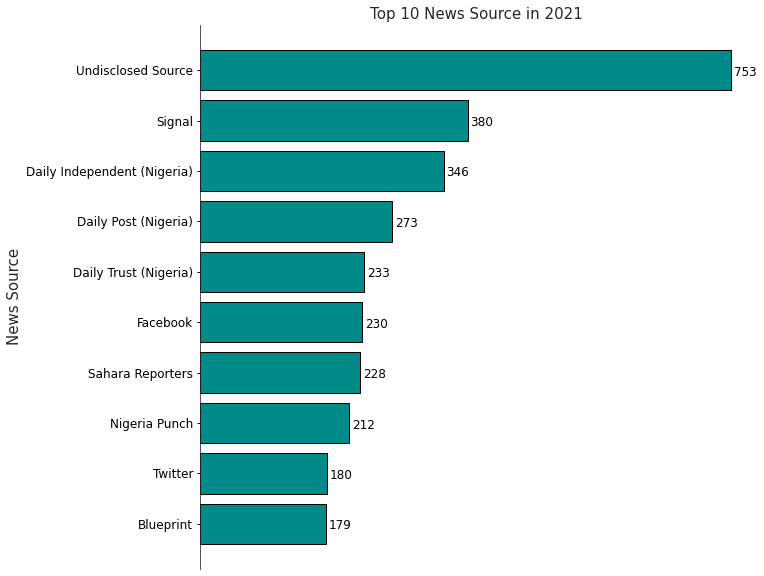

In [63]:
source_21 = df.source.value_counts().head(10)
f, ax = plt.subplots(1,1,figsize = (10,10))

ax.barh(source_21.index,source_21.values,color='DarkCyan',edgecolor='black')
ax.set_title("Top 10 News Source in 2021 ",
fontsize=15)

ax.set_ylabel("News Source", fontsize=15)
ax.tick_params(length=3, width=1, colors='black',labelsize='large',axis='y')
ax.set_yticklabels(source_21.index)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+4, i.get_y()+ 0.51, \
            str(round((i.get_width()),2)), fontsize=12, color='black')

# invert for largest on top 
ax.invert_yaxis()
sns.despine(bottom=True)
x_axis = ax.axes.get_xaxis().set_visible(False) # turn off the y axis label
plt.show()


## Analysis: The top news source is undisclosed. This is followed by 4 Nigerian media houses.

### 5.9 Conflicts Between Actors 

In [64]:
w_2 = df.groupby(['actor1','actor2']).sum()['fatalities'].reset_index().sort_values('fatalities',ascending=False).head(20)


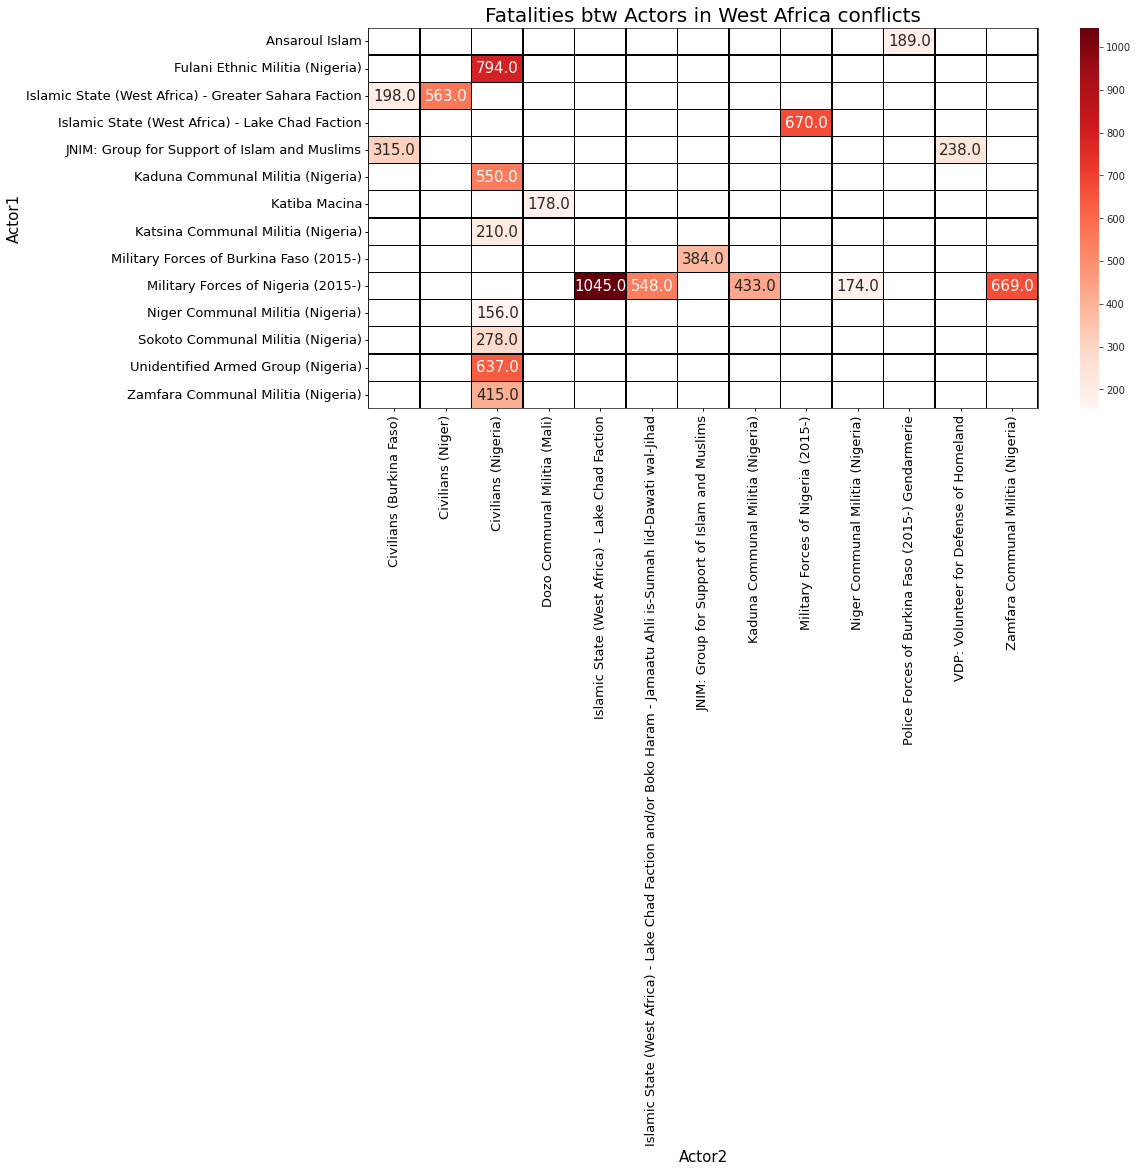

In [65]:
w_ang= w_2.pivot_table(index='actor1',columns='actor2',values='fatalities',aggfunc='sum')

f, ax = plt.subplots(figsize=(15,7))

ax = sns.heatmap(w_ang, cmap='Reds',linecolor='black',linewidths=0.2,annot=True,fmt='.1f',annot_kws={'fontsize':15})

ax.tick_params(axis = 'y',length=3, width=1, colors='black',labelsize=13)
ax.tick_params(axis = 'x',length=3, width=1, colors='black',labelsize=13)
kwargs= {'fontsize':15, 'color':'black'}
ax.set_xlabel('Actor2',**kwargs)
ax.set_ylabel('Actor1',**kwargs)
ax.set_title('Fatalities btw Actors in West Africa conflicts',fontsize=20, color='black')
sns.despine(top=False,right = False)
plt.show()


## Analysis: Conflict between the military Forces of Nigeria and the Islamic State West Africa lead in the number of fatalities

### 5.11 Month vs. Weekday Fatalities Distribution

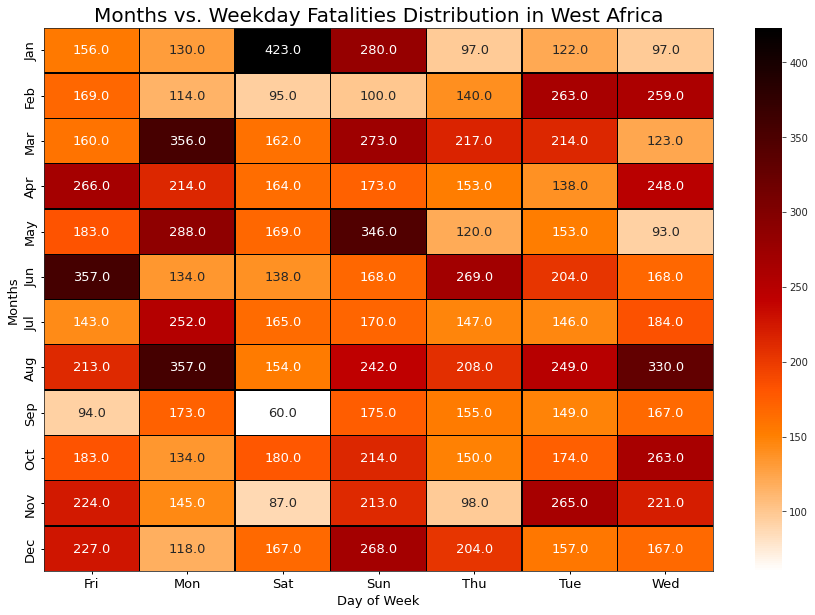

In [66]:
week_month_1= df.pivot_table(index='month',columns='day of week',values='fatalities',aggfunc='sum')
#Sorting the month Chronologically
week_month_1.index = pd.CategoricalIndex(week_month_1.index,
        categories= ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'])
week_month_1 = week_month_1.sort_index()
f, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(week_month_1, cmap='gist_heat_r',linecolor='black',linewidths=0.4,annot=True,fmt='.1f',annot_kws={'fontsize':13})
ax.tick_params(axis = 'y',length=3, width=1, colors='black',labelsize=13)
ax.tick_params(axis = 'x',length=3, width=1, colors='black',labelsize=13)
kwargs= {'fontsize':13, 'color':'black'}
ax.set_xlabel('Day of Week',**kwargs)
ax.set_ylabel('Months',**kwargs)
ax.set_title('Months vs. Weekday Fatalities Distribution in West Africa',fontsize=20, color = 'black')
sns.despine(top=False,right = False)
plt.show()


## Analysis: There is no clear pattern either in the month of the year or day of the week. However, September 2021 seems to have recorded fewer fatalities than the other months

## **6. Machine Translation of labels (notes) from English to French**

### 6.1 Download huggingface translator transformer

In [67]:
#Choose English to French translation
translator = pipeline("translation_en_to_fr")

No model was supplied, defaulted to t5-base (https://huggingface.co/t5-base)


Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

### 6.2. Read last 3 months of 2021 for translation

In [70]:

#read csv file from github repo
df_fr = pd.read_csv('https://raw.githubusercontent.com/obengdouglas/DSI-2022/main/module3-nlp-twist/Data/ACLED-2021-01-01-2021-12-31-Western_Africa.csv', sep=",", nrows = 2378, skip_blank_lines=True, na_filter=True)
df_fr.tail()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
2373,8597141,466,MLI5752,5752,01-Oct-21,2021,1,Violence against civilians,Attack,Islamic State (West Africa) - Greater Sahara F...,...,Lelehoy,15.5557,0.4944,1,UN MINUSMA; RFI,Other-International,"On 1 October 2021, ISWAP (Greater Sahara) mili...",0,1634581156,MLI
2374,8605877,566,NIG22279,22279,01-Oct-21,2021,1,Strategic developments,Looting/property destruction,Fulani Ethnic Militia (Nigeria),...,Itori,6.9306,3.2209,2,Nigeria Punch,National,"Property destruction: On 1 October 2021, suspe...",0,1635193321,NGA
2375,8667002,566,NIG22158,22158,01-Oct-21,2021,1,Explosions/Remote violence,Shelling/artillery/missile attack,Islamic State (West Africa) - Lake Chad Faction,...,Bama,11.5221,13.6856,1,Twitter; Undisclosed Source,Local partner-Other,"On 1 October 2021, ISWAP claimed a mortar shel...",0,1638292281,NGA
2376,8667188,566,NIG22160,22160,01-Oct-21,2021,1,Battles,Armed clash,Military Forces of Nigeria (2015-),...,Gwoza,11.0840,13.6925,2,Twitter,New media,"On 1 October 2021, Nigerian troops clashed wit...",3,1638292282,NGA
2377,8843364,854,BFO5413,5413,01-Oct-21,2021,1,Violence against civilians,Attack,Islamic State (West Africa) - Greater Sahara F...,...,Goungam,14.7014,0.0929,1,Facebook; Whatsapp,New media,"On 1 October 2021, presumed ISWAP (Greater Sah...",7,1645032563,BFA


In [71]:
df_fr.describe()

,data_id,iso,event_id_no_cnty,year,time_precision,inter1,inter2,interaction,latitude,longitude,geo_precision,fatalities,timestamp
count,2.378000e+03,2378.000000,2378.000000,2378.0,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000,2.378000e+03
mean,8.669457e+06,610.080740,12043.520606,2021.0,1.061817,3.297729,3.946594,32.957527,11.295017,1.185635,1.412952,1.622792,1.638478e+09
std,6.680761e+04,178.497832,8732.439043,0.0,0.244341,1.813938,2.988001,17.363988,3.482415,6.789494,0.503451,5.549284,3.060887e+06
min,8.574582e+06,132.000000,105.000000,2021.0,1.000000,1.000000,0.000000,10.000000,4.323400,-24.985100,1.000000,0.000000,1.633377e+09
25%,8.612427e+06,478.000000,5663.250000,2021.0,1.000000,2.000000,1.000000,16.000000,8.366700,-2.776400,1.000000,0.000000,1.635799e+09
50%,8.663554e+06,566.000000,6007.000000,2021.0,1.000000,3.000000,4.000000,27.000000,12.067150,0.822800,1.000000,0.000000,1.638225e+09
75%,8.704876e+06,854.000000,22478.750000,2021.0,1.000000,5.000000,7.000000,47.000000,13.831700,6.733900,2.000000,1.000000,1.641864e+09
max,9.106989e+06,854.000000,24085.000000,2021.0,3.000000,8.000000,8.000000,78.000000,25.140000,14.472400,3.000000,87.000000,1.650317e+09


In [7]:
start_time = time.monotonic() #measure time it takes to complete operation


In [8]:
tqdm.pandas() # shows progress bar for operation
df_fr["notes_fr"] = acled.notes.progress_apply(translator)
df_fr.head()


## Time for translating Q1 2022 in colaboratery (3005 rows) 8hrs 7mins 36secs - 9.74s/it
## Time for translating Q4 2021 in kaggle (2378 rows) 3hrs 49mins 22secs - 5.79s/it

100%|██████████| 3005/3005 [8:07:36<00:00,  9.74s/it]


,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,notes_fr
0,8974302,854,BFO6949,6949,31-Mar-22,2022,1,Violence against civilians,Attack,JNIM: Group for Support of Islam and Muslims a...,...,13.6451,-0.7156,2,Facebook; L'Observateur Paalga; Infowakat; Min...,New media-National,"On 31 March 2022, presumed JNIM or IS Sahel mi...",20,1649088162,BFA,"[{'translation_text': 'Le 31 mars 2022, des mi..."
1,8974306,854,BFO6964,6964,31-Mar-22,2022,1,Strategic developments,Looting/property destruction,JNIM: Group for Support of Islam and Muslims,...,11.9333,1.6167,1,Gulmu Info; Facebook; Undisclosed Source,Local partner-Other,"Looting: On 31 March 2022, presumed JNIM milit...",0,1649088162,BFA,[{'translation_text': 'Le pillage : Le 31 mars...
2,8974377,566,NIG24258,24258,31-Mar-22,2022,2,Battles,Armed clash,Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati...,...,13.6169,13.2644,2,Daily Post (Nigeria); Sahara Reporters; Daily ...,National-Regional,"Around 31 March 2022 (as reported), Boko Haram...",20,1649088162,NGA,[{'translation_text': 'Vers le 31 mars 2022 (t...
3,8974378,566,NIG24259,24259,31-Mar-22,2022,1,Battles,Armed clash,Unidentified Armed Group (Nigeria),...,6.2658,6.5973,2,Nigeria Punch; Guardian (Nigeria),National,"On 31 March 2022, armed individuals attacked s...",1,1649088162,NGA,"[{'translation_text': 'Le 31 mars 2022, des in..."
4,8974400,566,NIG24300,24300,31-Mar-22,2022,1,Strategic developments,Disrupted weapons use,Police Forces of Nigeria (2015-),...,10.5422,7.3302,1,Sahara Reporters; Daily Trust (Nigeria); Niger...,National-Regional,"Defusal: On 31 March 2022, operatives of the a...",0,1649088162,NGA,[{'translation_text': 'Défaut : Le 31 mars 202...


In [9]:
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

8:07:36.885580


In [10]:
#Output saved in github repo https://github.com/obengdouglas/DSI-2022/tree/main/module3-nlp-twist/Data
df_fr.to_csv("acled_fr.csv", index = False)

## **7. Conclusion**

From the analysis,

1. Nigeria, Burkina Faso and Mali are the top 3 countries for crisis events in West Africa accounting for a combined 78% of all events
2. Nigeria, Burkina Faso and Mali are also the top 3 countries for fatalities West Africa accounting for a combined 78% of all events
3. Fatalities are randomly distributed throughout the week and the year
4. Battles and violence cause the largest number of fatalities 